In [1]:
#### FEATURE IMPORTANCE ANALYSIS ####
# feature pertubation #

/pfs/data5/home/kit/stud/updzl/Experiment 1
/pfs/data5/home/kit/stud/updzl/Experiment 1


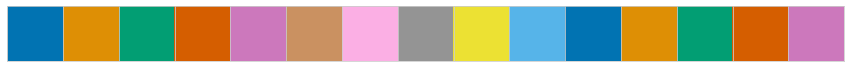

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import torch
#from google.colab import drive
import os
import torch
from torch import nn, optim
from torch.optim import Adam
import torch.nn.functional as F
import torch.utils.data as data_utils
from torch.utils.data import DataLoader
#!pip install torch pytorch-lightning
#import pytorch_lightning as pl
from torch.utils.data import Dataset
from torch.utils.data import DataLoader 
from torch.utils.data import TensorDataset, DataLoader
#import torchvision
#from torch.utils.tensorboard import SummaryWriter
import datetime
import csv
import time
import random
###
# Ralf Loritz 15.2.2022
# Rainfall-runoff using LSTM Models
# Pytorch
###
#%load_ext autoreload
#%autoreload 2 #Reload all modules every time before executing the Python code typed.

# built-in
import os
import importlib
import math
import collections
###
# addtional packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# import pytorch
import torch
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data_utils

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# set torch seed
def setup_seed(seed):
    random.seed(seed)                          
    np.random.seed(seed)                       
    torch.manual_seed(seed)                    
    torch.cuda.manual_seed(seed)               
    #torch.cuda.manual_seed_all(seed)  
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True  



# import from sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

# import own loss functions
#from src.loss_functions import kge, kgeprime, nse, rmse
#from src.ML_functions import onehot_encode_pd, lagged_features, get_scaler
#from src.ML_train import train_model

#-----------------------
#import src.ML_train
#importlib.reload(src.ML_train)
#from src.ML_train import train_model
#----------------------


###
# set plot style seaborn
sns.set_style("whitegrid")

# set colors
current_palette = sns.color_palette("colorblind", 15)
sns.palplot(current_palette)
print(os.getcwd())
# set workspcae
os.chdir('./')
print(os.getcwd())

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 200}
       
plt.rc('font', **font)
plt.rcParams["font.family"] = "Times New Roman"
import matplotlib.font_manager
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

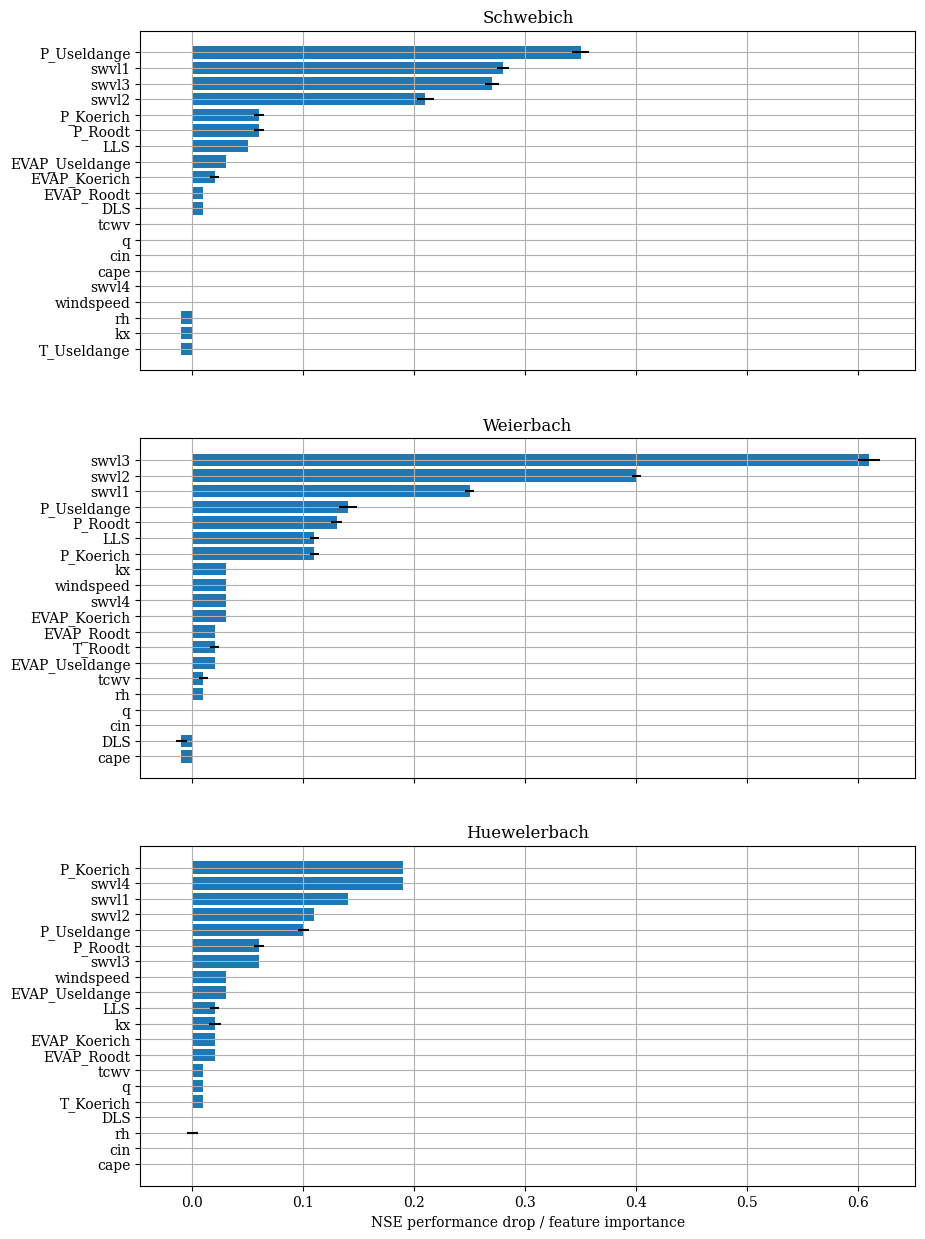

In [6]:
### Schwebich ###
os.chdir('/pfs/data5/home/kit/stud/updzl/Experiment 1')
schwebich = pd.read_csv('feature_importance_results_Schwebich', index_col=[0])
schwebich = -1*(schwebich.round(decimals=2)-0.8)
schwebich.loc['std'] = schwebich.std()
Schwebich_sorted = (schwebich.sort_values(by = 'mean', axis=1))
### Weierbach ###
weierbach = pd.read_csv('feature_importance_results_Weierbach', index_col=[0])
weierbach = -1*(weierbach.round(decimals=2)-0.8)
weierbach.loc['std'] = weierbach.std()
Weierbach_sorted = (weierbach.sort_values(by = 'mean', axis=1))
### Huewelerbach ###
huewelerbach = pd.read_csv('feature_importance_results_Huewelerbach', index_col=[0])
huewelerbach = -1*(huewelerbach.round(decimals=2)-0.64)
huewelerbach.loc['std'] = huewelerbach.std()
Huewelerbach_sorted = (huewelerbach.sort_values(by = 'mean', axis=1))
### Mierbech ###
mierbech = pd.read_csv('feature_importance_results_Mierbech', index_col=[0])
mierbech = -1*(mierbech.round(decimals=2)-0.62)
mierbech.loc['std'] = mierbech.std()
Mierbech_sorted = (mierbech.sort_values(by = 'mean', axis=1))
### Bibeschbach ###
bibeschbach = pd.read_csv('feature_importance_results_Bibeschbach', index_col=[0])
bibeschbach = -1*(bibeschbach.round(decimals=2)-0.67)
bibeschbach.loc['std'] = bibeschbach.std()
Bibeschbach_sorted = (bibeschbach.sort_values(by = 'mean', axis=1))

### PLoT ###
plt.rcdefaults()
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
fig, ax = plt.subplots(3, 1, sharex=True)
#fig.set_figheight(15)
#fig.set_figwidth(45)
fig.set_size_inches(10,15)
ax[0].barh(Schwebich_sorted.columns, Schwebich_sorted.loc['mean'], xerr=Schwebich_sorted.loc['std'])
ax[0].set_title('Schwebich')
ax[0].grid()
ax[1].barh(Weierbach_sorted.columns, Weierbach_sorted.loc['mean'], xerr=Weierbach_sorted.loc['std'])
ax[1].set_title('Weierbach')
ax[1].grid()
ax[2].barh(Huewelerbach_sorted.columns, Huewelerbach_sorted.loc['mean'], xerr=Huewelerbach_sorted.loc['std'])
ax[2].set_title('Huewelerbach')
#ax[1,0].barh(Mierbech_sorted.columns, Mierbech_sorted.loc['mean'], xerr=Mierbech_sorted.loc['std'])
#ax[1,0].set_title('Mierbech')
#ax[1,1].barh(Bibeschbach_sorted.columns, Bibeschbach_sorted.loc['mean'], xerr=Bibeschbach_sorted.loc['std'])
#ax[1,1].set_title('Bibeschbach')
ax[2].grid()
ax[2].set_xlabel('NSE performance drop / feature importance')
#ax.set_yticks(y_pos, labels=people)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Performance')
#ax.set_title('How fast do you want to go today?')

plt.show()

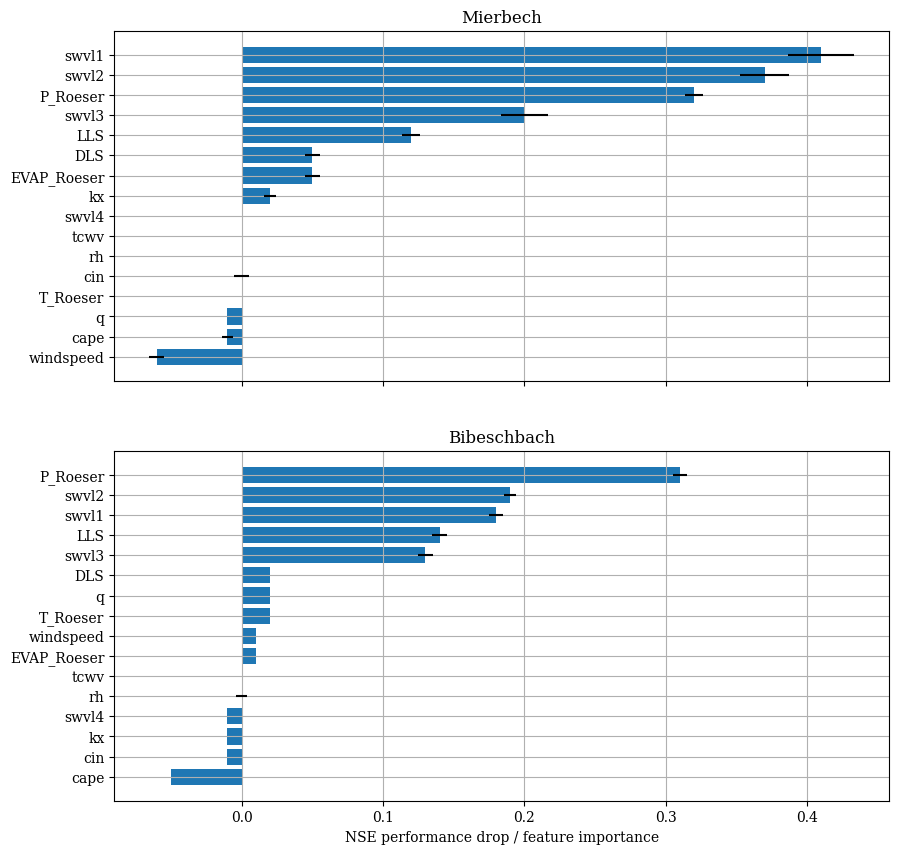

In [8]:
import matplotlib.font_manager
plt.rcdefaults()
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

fig, ax = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(10,10)
ax[0].barh(Mierbech_sorted.columns, Mierbech_sorted.loc['mean'], xerr=Mierbech_sorted.loc['std'])
ax[0].set_title('Mierbech')
ax[0].grid()
ax[1].barh(Bibeschbach_sorted.columns, Bibeschbach_sorted.loc['mean'], xerr=Bibeschbach_sorted.loc['std'])
ax[1].set_title('Bibeschbach' )
ax[1].set_xlabel('NSE performance drop / feature importance')
ax[1].grid()

NameError: name 'df' is not defined